Best Norm MSE for SR_Benefit: 0.1807, Features: F41, OF19, OF21
Best Non-Norm MSE for SR_Benefit: 2.5425, Features: F41, OF19
Best Non-Norm-Normalized MSE for SR_Benefit: 2.3806, Features: F41, OF19
Ensemble Non-Norm MSE for SR_Benefit: 3.8378, Features: F41, OF19, OF22
Ensemble Non-Norm-Normalized MSE for SR_Benefit: 3.6754, Features: F41, OF19, OF22
Ensemble Norm MSE for SR_Benefit: 0.3496, Features: F41, OF19, OF21


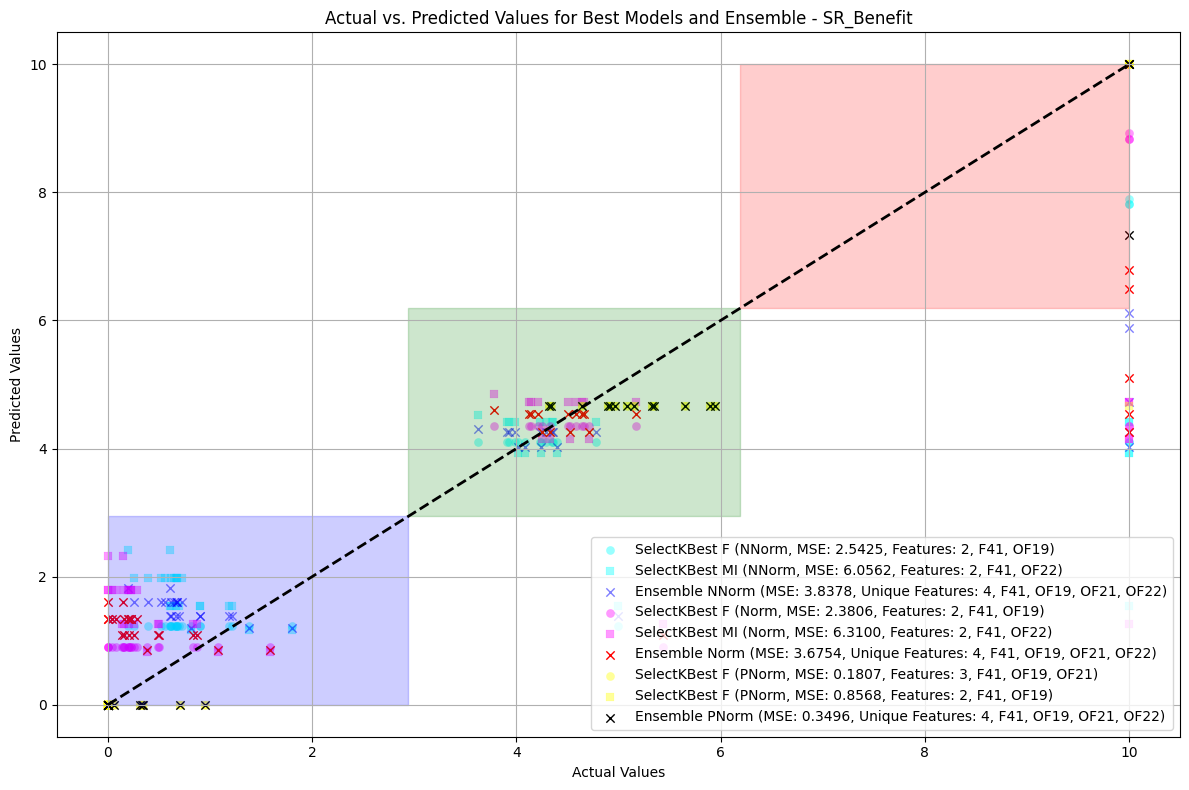

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import os
from sklearn.metrics import mean_squared_error

# Configuration for all functions
config = {
    "WS": {"min": 1.58, "max": 8.61, "lower": 3.07, "higher": 6.17},
    "PR": {"min": 2.07, "max": 10.0, "lower": 3.66, "higher": 6.11},
    "NR": {"min": 4.10, "max": 10.0, "lower": 2.06, "higher": 4.42},
    "SR": {"min": 2.29, "max": 10.0, "lower": 3.02, "higher": 6.67},
    "SFST": {"min": 0.0, "max": 7.71, "lower": 1.05, "higher": 6.51},
    "WS_Benefit": {"min": 0.08, "max": 10.0, "lower": 2.65, "higher": 6.50},
    "PR_Benefit": {"min": 0.49, "max": 10.0, "lower": 3.29, "higher": 6.68},
    "NR_Benefit": {"min": 0.71, "max": 10.0, "lower": 4.10, "higher": 7.76},
    "SR_Benefit": {"min": 0.49, "max": 8.79, "lower": 2.94, "higher": 6.19},
    "SFST_Benefit": {"min": 0.0, "max": 7.19, "lower": 1.86, "higher": 5.30}
}

# Define specific features for each function
feature_selection = {
    'PR': ['OF22', 'OF26', 'OF27', 'F17', 'F20', 'F21', 'F23', 'F24', 'F28', 'F29', 'F31', 'F33', 'F34', 'F35', 'F36', 'F38', 'F43', 'F44', 'F45', 'F49', 'F63'],
    'NR': ['OF16', 'OF18', 'OF22', 'OF25', 'OF26', 'OF27', 'F1', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F6', 'F17', 'F18', 'F20', 'F21', 'F22', 'F23', 'F24', 'F28', 'F31', 'F33', 'F34', 'F36', 'F43', 'F44', 'F45', 'F48', 'F49', 'F54', 'S5'],
    'SR': ['OF22', 'OF26', 'OF27', 'F9', 'F17', 'F20', 'F22', 'F28', 'F29', 'F31', 'F33', 'F34', 'F35', 'F36', 'F43', 'F44', 'F45', 'F49', 'S5'],
    'WS': ['OF22', 'OF26', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F20', 'F21', 'F22', 'F28', 'F31', 'F43', 'F44', 'F45', 'F48', 'F49'],
    'SFST': ['F1', 'F3_a', 'F3_b', 'F3_c', 'F3_d', 'F3_e', 'F3_f', 'F3_g', 'F14', 'F17', 'F21', 'F24', 'F25', 'F29', 'F31', 'F33', 'F34', 'F43', 'F47', 'F48'],
    'PR_Benefit': ['OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'F41', 'F48', 'F50', 'F52'],
    'NR_Benefit': ['OF9', 'OF10', 'OF11', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'F13', 'F41', 'F50', 'F51', 'F52'],
    'SR_Benefit': ['OF18', 'OF19', 'OF20', 'OF21', 'OF22', 'OF23', 'OF24', 'F24', 'F28', 'F41', 'F50', 'F52', 'F55', 'S4'],
    'WS_Benefit': ['OF8', 'OF17', 'OF18', 'OF23', 'OF24', 'F51'],
    'SFST_Benefit': ['OF18', 'OF22', 'OF25', 'OF27', 'OF28', 'F50'],
}

def normalize_predictions(predicted, actual, feature):
    min_val = config[feature]["min"]
    max_val = config[feature]["max"]
    return np.clip((predicted - min_val) / (max_val - min_val) * 10, 0, 10), np.clip((actual - min_val) / (max_val - min_val) * 10, 0, 10)


# Number of top models to display in the legend
top_n_models = 2

# List of features to process
#result_columns_list = ['WS', 'NR', 'PR', 'SR', 'SFST', 'WS_Benefit', 'NR_Benefit', 'PR_Benefit', 'SR_Benefit', 'SFST_Benefit']
result_columns_list = ['SR_Benefit', ]

# Mapping for technique names to their shorter versions
technique_name_map = {
    "SelectKBest_f_regression": "SelectKBest F",
    "SelectKBest_mutual_info_regression": "SelectKBest MI",
    "VarianceThreshold": "VarianceThreshold"
}

for g in range(len(result_columns_list)):
    TITLE = result_columns_list[g]
    params = config[TITLE]
    
    all_results = []

    for norm_type in ['non_norm', 'norm']:
        test_results_path = f"./test_results_{TITLE}_{norm_type}.csv"
        if not os.path.exists(test_results_path):
            continue

        test_results_df = pd.read_csv(test_results_path)
    
        # List of feature selection techniques
        feature_selection_techniques = [
            "SelectKBest_f_regression",
            "SelectKBest_mutual_info_regression",
            "VarianceThreshold"
        ]
    
        # Iterate over each feature selection technique
        for technique in feature_selection_techniques:
            # Filter results for the current technique
            technique_results = test_results_df[test_results_df['Selection Method'] == technique]
    
            # Select results with fewer than or equal to 5 features
            technique_results = technique_results[technique_results['Number of Features'] <= 3]
    
            # Add the results to the list
            for idx, row in technique_results.iterrows():
                # Extract actual and predicted values
                actual_values = np.clip(np.array(ast.literal_eval(row['Actual'])), 0, 10)  # Convert to numpy array and clip
                predicted_values = np.clip(np.array(ast.literal_eval(row['Predicted'])), 0, 10)  # Convert to numpy array and clip
                
                # Normalize non-norm results
                predicted_values_norm, actual_values_norm = None, None
                if norm_type == 'non_norm':
                    predicted_values_norm, actual_values_norm = normalize_predictions(predicted_values, actual_values, TITLE)
                
                features = ast.literal_eval(row['Selected Features'])

                # Filter selected features based on specific features defined for the function
                specific_features = feature_selection.get(TITLE, features)
                filtered_features = [feature for feature in features if feature in specific_features]
                num_features = len(filtered_features)
    
                # Sort and format features list
                sorted_features = ', '.join(sorted(map(str, filtered_features))).replace("'", "")

                all_results.append({
                    'Technique': technique_name_map.get(technique, technique),  # Use the shortened name
                    'MSE': row['MSE'],  # Using MSE instead of RMSE
                    'Actual': actual_values,
                    'Actual_Norm': actual_values_norm,
                    'Predicted': predicted_values,
                    'Predicted_Norm': predicted_values_norm,
                    'Features': sorted_features,
                    'Number of Features': num_features,
                    'Norm Type': norm_type
                })
    
    # Separate all results into norm and non-norm lists
    norm_results = sorted([result for result in all_results if result['Norm Type'] == 'norm'], key=lambda x: x['MSE'])[:top_n_models]
    non_norm_results = sorted([result for result in all_results if result['Norm Type'] == 'non_norm'], key=lambda x: x['MSE'])[:top_n_models]

    # Set to store features from the top models
    top_features = set()
    for result in norm_results + non_norm_results:
        top_features.update(result['Features'].split(', '))
        

    # Colors and markers for the selected models
    colors = {
        'non_norm': ['cyan'] * top_n_models,
        'norm_by_code': ['magenta'] * top_n_models,
        'norm': ['yellow'] * top_n_models,
        'pre_norm': ['green'] * top_n_models  # New color for pre-norm
    }
    markers = ['o', 's', '^']
    
    # Plot the actual vs. predicted values for the best cases
    plt.figure(figsize=(12, 8))

    # Plot the non-norm models first (raw non-normalized)
    for idx, result in enumerate(non_norm_results):
        plt.scatter(result['Actual'], result['Predicted'],
                    label=f"{result['Technique']} (NNorm, MSE: {result['MSE']:.4f}, Features: {result['Number of Features']}, {result['Features']})",
                    color=colors['non_norm'][idx], marker=markers[idx], linewidths=0.15, alpha=0.4)

    # Ensemble for non-norm (raw non-normalized)
    if non_norm_results:
        ensemble_actual_non_norm = np.clip(non_norm_results[0]['Actual'], 0, 10)  # Assuming same actual values for all non-norm results
        ensemble_predicted_non_norm = np.clip(np.mean([result['Predicted'] for result in non_norm_results], axis=0), 0, 10)
        ensemble_mse_non_norm = mean_squared_error(ensemble_actual_non_norm, ensemble_predicted_non_norm)
        ensemble_features_non_norm = ', '.join(sorted(top_features))

        # Plot ensemble predictions for non-normalized models
        plt.scatter(ensemble_actual_non_norm, ensemble_predicted_non_norm,
                    label=f"Ensemble NNorm (MSE: {ensemble_mse_non_norm:.4f}, Unique Features: {len(top_features)}, {ensemble_features_non_norm})",
                    color='blue', marker='x', linewidths=1, alpha=0.5)

    # Plot the non-norm-normalized models
    for idx, result in enumerate(non_norm_results):
        plt.scatter(result['Actual_Norm'], result['Predicted_Norm'],
                    label=f"{result['Technique']} (Norm, MSE: {mean_squared_error(result['Actual_Norm'], np.clip(result['Predicted_Norm'], 0, 10)):.4f}, Features: {result['Number of Features']}, {result['Features']})",
                    color=colors['norm_by_code'][idx], marker=markers[idx], linewidths=0.15, alpha=0.4)

    # Ensemble for non-norm-normalized
    if non_norm_results:
        ensemble_actual_non_norm = np.clip(non_norm_results[0]['Actual_Norm'], 0, 10)  # Assuming same actual values for all
        ensemble_predicted_non_norm = np.clip(np.mean([result['Predicted_Norm'] for result in non_norm_results], axis=0), 0, 10)
        ensemble_mse_non_norm = mean_squared_error(ensemble_actual_non_norm, ensemble_predicted_non_norm)
        ensemble_features_non_norm = ', '.join(sorted(top_features))
        plt.scatter(ensemble_actual_non_norm, ensemble_predicted_non_norm,
                    label=f"Ensemble Norm (MSE: {ensemble_mse_non_norm:.4f}, Unique Features: {len(top_features)}, {ensemble_features_non_norm})",
                    color='red', marker='x', linewidths=1)

    # Plot the norm models second
    for idx, result in enumerate(norm_results):
        plt.scatter(result['Actual'], result['Predicted'],
                    label=f"{result['Technique']} (PNorm, MSE: {result['MSE']:.4f}, Features: {result['Number of Features']}, {result['Features']})",
                    color=colors['norm'][idx], marker=markers[idx], linewidths=0.15, alpha=0.4)
    
    # Ensemble for norm
    if norm_results:
        ensemble_actual_norm = np.clip(norm_results[0]['Actual'], 0, 10)  # Assuming same actual values for all
        ensemble_predicted_norm = np.clip(np.mean([result['Predicted'] for result in norm_results], axis=0), 0, 10)
        ensemble_mse_norm = mean_squared_error(ensemble_actual_norm, ensemble_predicted_norm)
        ensemble_features_norm = ', '.join(sorted(top_features))
        plt.scatter(ensemble_actual_norm, ensemble_predicted_norm,
                    label=f"Ensemble PNorm (MSE: {ensemble_mse_norm:.4f}, Unique Features: {len(top_features)}, {ensemble_features_norm})",
                    color='black', marker='x', linewidths=1)

        # Print the best (lowest) MSE for norm and non-norm data
    if norm_results:
        best_norm_result = norm_results[0]
        print(f"Best Norm MSE for {TITLE}: {best_norm_result['MSE']:.4f}, Features: {best_norm_result['Features']}")
    
    if non_norm_results:
        best_non_norm_result = non_norm_results[0]
        print(f"Best Non-Norm MSE for {TITLE}: {best_non_norm_result['MSE']:.4f}, Features: {best_non_norm_result['Features']}")
    
    if non_norm_results:
        best_non_norm_norm_result = sorted(non_norm_results, key=lambda x: mean_squared_error(x['Actual_Norm'], np.clip(x['Predicted_Norm'], 0, 10)))[0]
        print(f"Best Non-Norm-Normalized MSE for {TITLE}: {mean_squared_error(best_non_norm_norm_result['Actual_Norm'], np.clip(best_non_norm_norm_result['Predicted_Norm'], 0, 10)):.4f}, Features: {best_non_norm_norm_result['Features']}")
    
    # Calculate and print the ensemble MSE for non-norm, norm, and non-norm-normalized cases
    if non_norm_results:
        ensemble_actual_non_norm = np.clip(non_norm_results[0]['Actual'], 0, 10)
        ensemble_predicted_non_norm = np.clip(np.mean([result['Predicted'] for result in non_norm_results], axis=0), 0, 10)
        ensemble_mse_non_norm = mean_squared_error(ensemble_actual_non_norm, ensemble_predicted_non_norm)
        ensemble_features_non_norm = ', '.join(sorted(set(sum([result['Features'].split(', ') for result in non_norm_results], []))))
        print(f"Ensemble Non-Norm MSE for {TITLE}: {ensemble_mse_non_norm:.4f}, Features: {ensemble_features_non_norm}")
    
    if non_norm_results:
        ensemble_actual_non_norm_norm = np.clip(non_norm_results[0]['Actual_Norm'], 0, 10)
        ensemble_predicted_non_norm_norm = np.clip(np.mean([result['Predicted_Norm'] for result in non_norm_results], axis=0), 0, 10)
        ensemble_mse_non_norm_norm = mean_squared_error(ensemble_actual_non_norm_norm, ensemble_predicted_non_norm_norm)
        ensemble_features_non_norm_norm = ', '.join(sorted(set(sum([result['Features'].split(', ') for result in non_norm_results], []))))
        print(f"Ensemble Non-Norm-Normalized MSE for {TITLE}: {ensemble_mse_non_norm_norm:.4f}, Features: {ensemble_features_non_norm_norm}")
    
    if norm_results:
        ensemble_actual_norm = np.clip(norm_results[0]['Actual'], 0, 10)
        ensemble_predicted_norm = np.clip(np.mean([result['Predicted'] for result in norm_results], axis=0), 0, 10)
        ensemble_mse_norm = mean_squared_error(ensemble_actual_norm, ensemble_predicted_norm)
        ensemble_features_norm = ', '.join(sorted(set(sum([result['Features'].split(', ') for result in norm_results], []))))
        print(f"Ensemble Norm MSE for {TITLE}: {ensemble_mse_norm:.4f}, Features: {ensemble_features_norm}")
    
        
    
    # Plot a reference line at x=y
    plt.plot([0, 10], [0, 10], 'k--', linewidth=2)  # Black dotted line at x=y
    
    # Add filled regions for class boundaries
    plt.fill_betweenx([0, params['lower']], 0, params['lower'], color='blue', alpha=0.1)
    plt.fill_between([params['lower'], params['higher']], params['lower'], params['higher'], color='green', alpha=0.1)
    plt.fill_betweenx([params['higher'], 10], params['higher'], 10, color='red', alpha=0.1)
    
    plt.fill_between([0, params['lower']], 0, params['lower'], color='blue', alpha=0.1)
    plt.fill_between([params['lower'], params['higher']], params['lower'], params['higher'], color='green', alpha=0.1)
    plt.fill_between([params['higher'], 10], params['higher'], 10, color='red', alpha=0.1)

    # Add labels and legend
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values for Best Models and Ensemble - {TITLE}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    
    # Save plot
    plt.savefig(f"actual_vs_predicted_best_feature_selection_and_ensemble_{TITLE}_10.png")
    
    # Show plot
    #plt.show()
